In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from svetlanna import elements
from svetlanna import SimulationParameters
from svetlanna.units import ureg
from svetlanna import wavefront as w

# Gaussain Beam propagation

In this example we will use `svetlanna.wavefront` functional to create some wavefronts.

Firstly, it's necessary to create the numerical mesh using `SimulationParameters` class. You must define your screen size $l_x\times l_y$, number of nodes $N_x\times N_y$ along axis and wavefront's wavelength(group of wavelengths). 

Secondly, you can use `svetlanna.Wavefront.<wavefront_type>` functional to create required wavefront. Available types: Gaussian beam, planar wave and spherical wave. Moreover, it's possible to pass arbitrary `torch.Tensor` object that describes your specific wavefront to `svetlanna.Wavefront(<torch.Tensor>)`. 

**Remark:** you can create `torch.tensor([wavelength1, wavelength2, ..., wavelengthN])` object and pass it to `SimulationParameters` if it's necessary to propagate several wavefronts with different wavelengths.

## Creating numerical mesh with using `SimulationParameters` class

In [47]:
Nx = 1500   # number of nodes in x direction
Ny = 1500   # number of nodes in y direction

lx = 16 * ureg.mm    # size of the grid in x direction
ly = 16 * ureg.mm  # size of the grid in y direction

wavelength = torch.tensor([330, 1064]) * ureg.nm  # wavelength of the light

# creating SimulationParameters exemplar
sim_params = SimulationParameters({
    'W': torch.linspace(-lx / 2, lx / 2, Nx),
    'H': torch.linspace(-ly / 2, ly / 2, Ny),
    'wavelength': wavelength,
})


In [48]:
# return 2d-tensors of x and y coordinates
x_grid, y_grid = sim_params.meshgrid(x_axis='W', y_axis='H')

## Creating preloaded beams

Let's create two Gaussian beams with wavelengths defined above. Both of beams will propagate along distance $z$

In [100]:
w0 = 2 * ureg.mm  # waist radius of the Gaussian Beam
z = 2 * ureg.cm  # propagation distance

# return svetlanna.Wavefront class exemplar
output_field = w.Wavefront.gaussian_beam(
    simulation_parameters=sim_params,
    waist_radius=w0,
    distance=z
)

# .intensity property of svetlanna.Wavefront class exemplar
# returns 2d-tensor which describes intensity profile of the wavefront
output_intensity = output_field.intensity

Visualize intensity profiles:

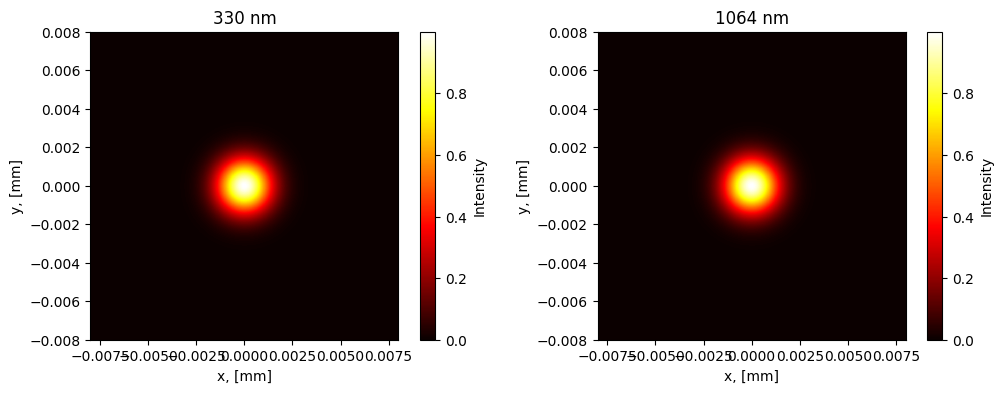

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
beam1 = ax[0].pcolormesh(x_grid.numpy(force=True), y_grid.numpy(force=True), output_intensity[0].numpy(force=True), cmap='hot')
beam2 = ax[1].pcolormesh(x_grid.numpy(force=True), y_grid.numpy(force=True), output_intensity[1].numpy(force=True), cmap='hot')

ax[0].set_title('330 nm')
ax[1].set_title('1064 nm')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].set_xlabel('x, [mm]')
ax[0].set_ylabel('y, [mm]')
ax[1].set_xlabel('x, [mm]')
ax[1].set_ylabel('y, [mm]')
fig.colorbar(beam1, ax=ax[0], label='Intensity')
fig.colorbar(beam2, ax=ax[1], label='Intensity')

## Arbitrary wavefront propagation

You can use `svetlanna.elements.FreeSpace` class to propagate arbitrary wavefront using Angular Spectrum method or Fresnel method. It's necessary to define:

1. Propagation distance
2. Method
3. Input wavefront into `.forward(incident_wavefront=<svetlanna.Wavefront>)` method for `FreeSpace` class


Let's propagate our beams using Angular Spectrum method on distance $z_0$:

In [102]:
z0 = 100 * ureg.cm  # propagation distance

free_space = elements.FreeSpace(
    simulation_parameters=sim_params,
    distance=z0,
    method="AS"
)

# .forward() return svetlanna.Wavefront class exemplar
free_space_output = free_space.forward(incident_wavefront=output_field)

free_space_output_intensity = free_space_output.intensity

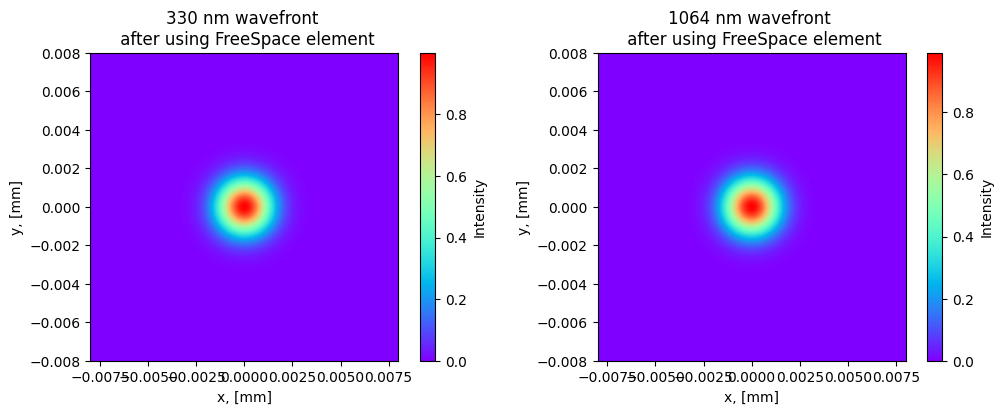

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
beam1 = ax[0].pcolormesh(x_grid.numpy(force=True), y_grid.numpy(force=True), free_space_output_intensity[0].numpy(force=True), cmap='rainbow')
beam2 = ax[1].pcolormesh(x_grid.numpy(force=True), y_grid.numpy(force=True), free_space_output_intensity[1].numpy(force=True), cmap='rainbow')

ax[0].set_title('330 nm wavefront \n after using FreeSpace element')
ax[1].set_title('1064 nm wavefront \n after using FreeSpace element')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].set_xlabel('x, [mm]')
ax[0].set_ylabel('y, [mm]')
ax[1].set_xlabel('x, [mm]')
ax[1].set_ylabel('y, [mm]')
fig.colorbar(beam1, ax=ax[0], label='Intensity')
fig.colorbar(beam2, ax=ax[1], label='Intensity')